## 3-1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

# 폰트설정
plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline


In [3]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

## 3-2

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape


(91335, 39)

In [5]:
# shift + tab -> docstirng 볼 수 있음.
df.head(1) #데이터 미리보기

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [6]:
df.tail(1) # 마지막 부분의 데이터들만(5개)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [7]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [8]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [9]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 3-3

In [10]:
# 결측치
null_count = df.isnull().sum() # True == 1

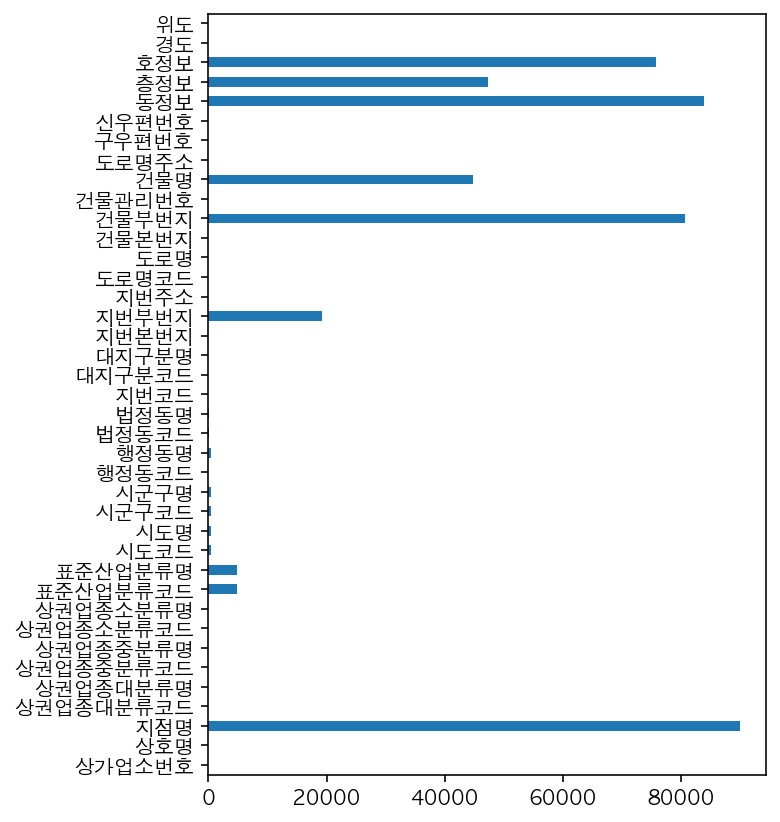

In [11]:
null_count.plot.barh(figsize= (5, 7)) # 결측치 막대그래프화

In [12]:
df_null_count = null_count.reset_index() # 데이터 프레임화
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [13]:
df_null_count.columns = ['컬럼명', '결측치수']

In [14]:
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [15]:
# 정렬하기
df_null_count_top = df_null_count.sort_values(by = '결측치수', ascending = False).head(10)

In [16]:
#특정 컬럼만 불러오기
df['지점명'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [17]:
drop_columns = df_null_count_top['컬럼명'].tolist() # NaN많은 column 상위 10개선택


In [18]:
# drop 시킴
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


In [19]:
# 제거하기
print(df.shape)
df = df.drop(drop_columns, axis = 1)
print(df.shape)

(91335, 39)
(91335, 29)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 3-4

In [21]:
# 기초 통계 수치

df['위도'].mean()

36.62471119236673

In [22]:
df['위도'].median()

37.23465231770329

In [23]:
df['위도'].max()

38.499658570559795

In [24]:
df['위도'].min()

33.2192896688307

In [25]:
df['위도'].count()

91335

In [26]:
# 대략적인 통계값 한번에

df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [27]:
# 2개의 값을 가져오려면 이중리스트 안에

df[['위도', '경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [28]:
# describe로 문자열 데이터타입의 요약은?
# 수치형 요약은 당연히 불가능

df.describe(include = 'object')

# top == 가장 많이 등장한 단어


,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


In [29]:
df.describe(include = 'all')
# 데이터 타입에 따른 불가능한 값은 NaN처리

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
count,9.133500e+04,91335,91335,91335,91335,91335,91335,91335,90956,90956.000000,...,91335,9.133500e+04,91335,91335.000000,91335,91335,91323.000000,91333.00000,91335.000000,91335.000000
unique,NaN,56910,1,1,5,5,34,34,17,NaN,...,53118,NaN,16610,NaN,54142,54031,NaN,NaN,NaN,NaN
top,NaN,리원,S,의료,S01,병원,S02A01,약국,경기도,NaN,...,서울특별시 동대문구 제기동 965-1,NaN,서울특별시 강남구 강남대로,NaN,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10,NaN,NaN,NaN,NaN
freq,NaN,152,91335,91335,60774,60774,18964,18964,21374,NaN,...,198,NaN,326,NaN,198,198,NaN,NaN,NaN,NaN
mean,2.121818e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32898.381877,...,NaN,3.293207e+11,NaN,251.200482,NaN,NaN,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12985.393171,...,NaN,1.297391e+11,NaN,477.456487,NaN,NaN,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11110.000000,...,NaN,1.111020e+11,NaN,0.000000,NaN,NaN,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26350.000000,...,NaN,2.635042e+11,NaN,29.000000,NaN,NaN,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41117.000000,...,NaN,4.111743e+11,NaN,92.000000,NaN,NaN,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43113.000000,...,NaN,4.311332e+11,NaN,257.000000,NaN,NaN,602811.000000,46044.00000,128.108919,37.507463


## 3-5

In [30]:
# 중복제거

df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [31]:
# unique값 개수

df['상권업종대분류명'].nunique()

1

In [32]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [33]:
df['상권업종중분류명'].nunique()

5

In [34]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [35]:
df['상권업종소분류명'].nunique() # len()도 가능

34

In [36]:
# 그룹화된 요약값 - value_counts()

df['시도명'].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [37]:
# normalize = True -> 비율 

df['시도명'].value_counts(normalize = True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

In [38]:
city = df['시도명'].value_counts()
city_normalize = df['시도명'].value_counts(normalize = True)

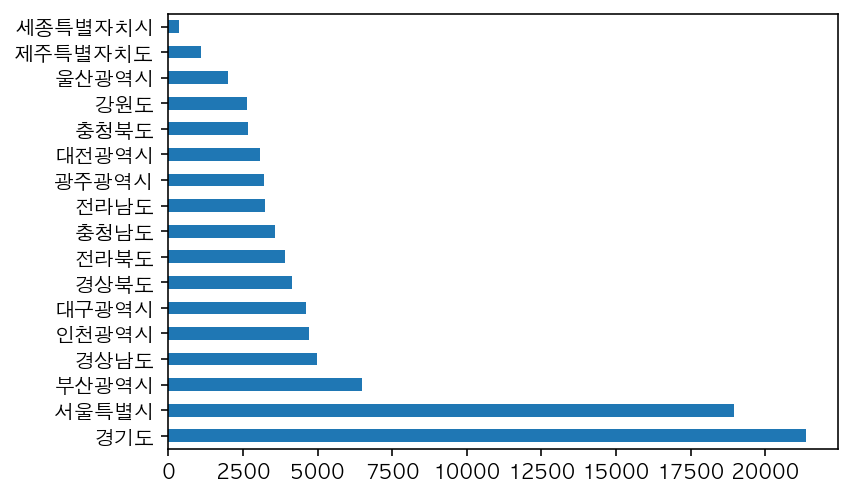

In [39]:
city.plot.barh()

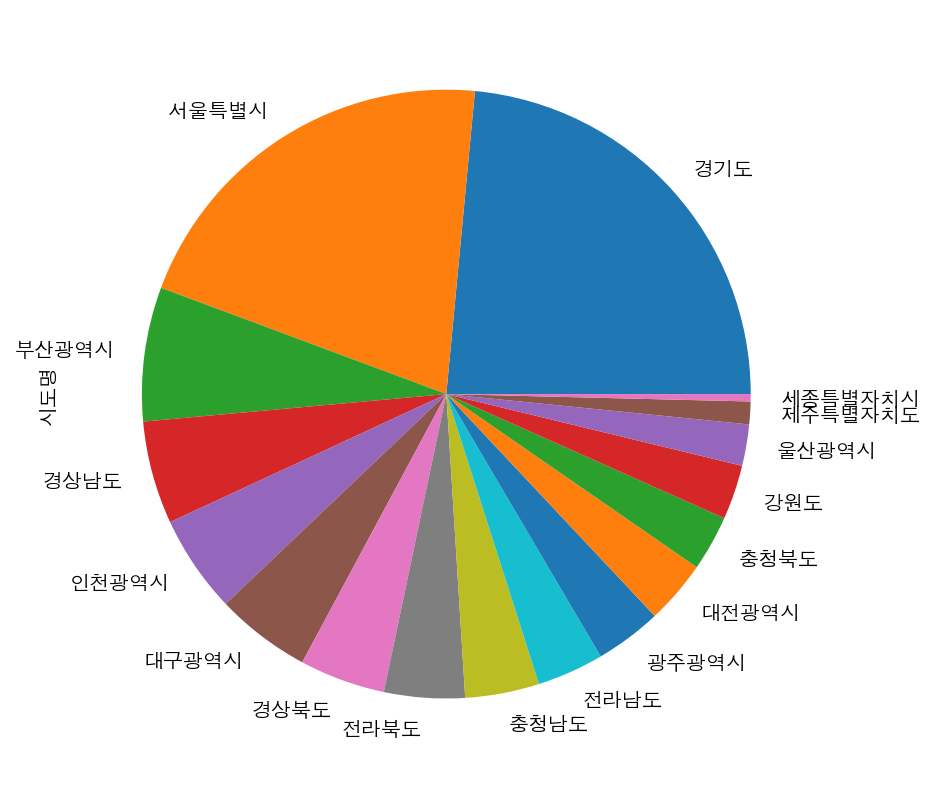

In [40]:
# plot.pie() -> pie 그래프
city.plot.pie(figsize = (7, 7))

## 3-6

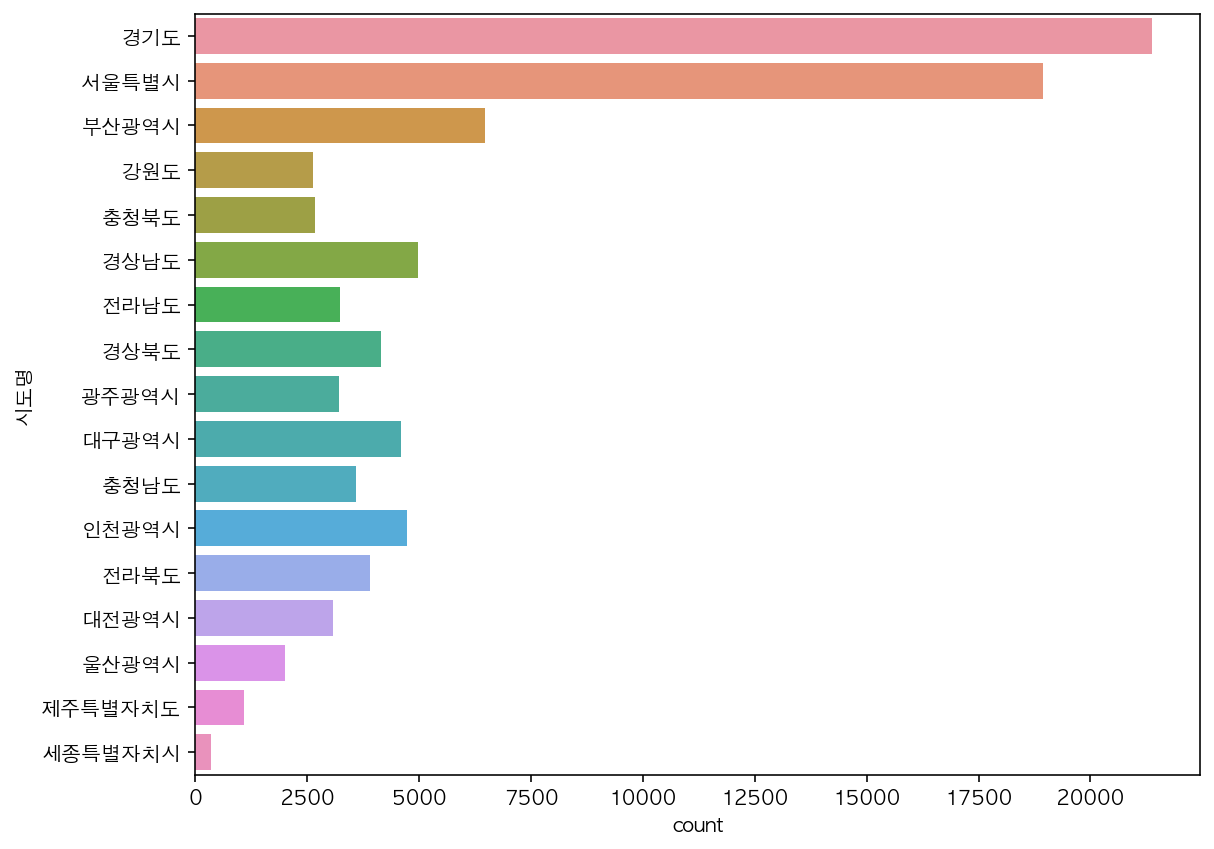

In [41]:
plt.figure(figsize = (9, 7))
sns.countplot(data = df, y = '시도명')

In [42]:
# value_counts() -> 결측치는 자동 제거

df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [43]:
c = df['상권업종중분류명'].value_counts()

In [44]:
n = df['상권업종중분류명'].value_counts(normalize = True)

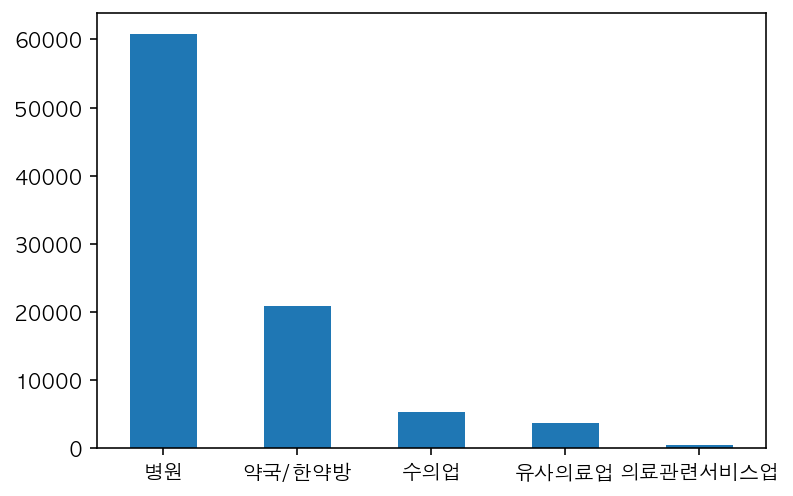

In [45]:
# x값 회전 -> 보기좋게
c.plot.bar(rot = 0)

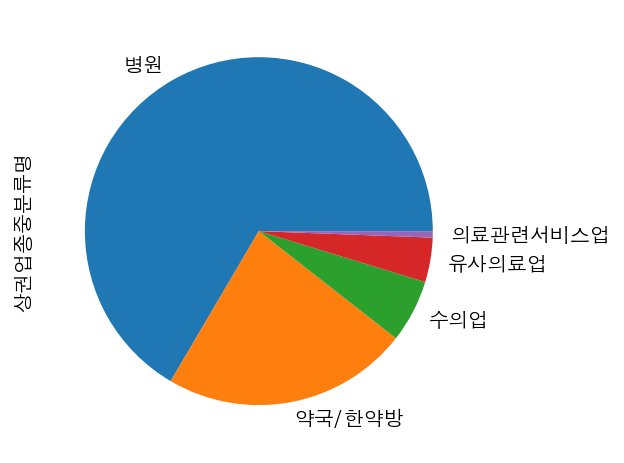

In [46]:
n.plot.pie()

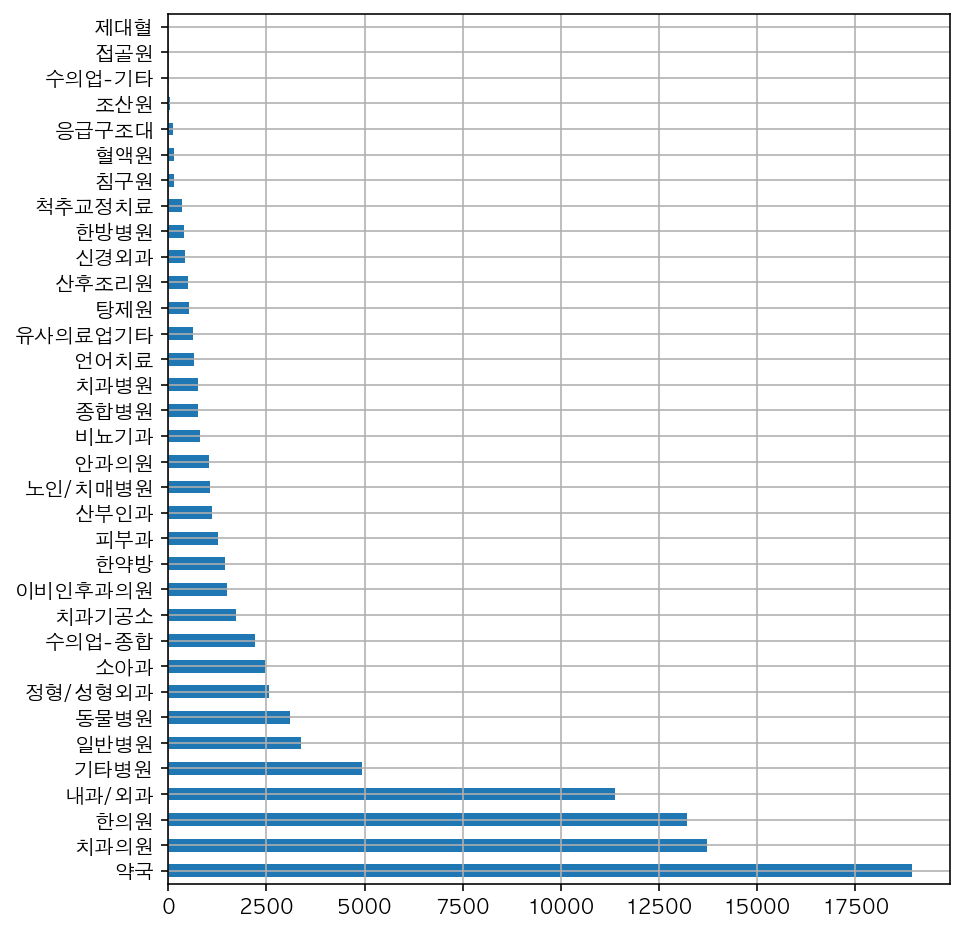

In [47]:
c = df['상권업종소분류명'].value_counts()

# grid -> 격자 표시
c.plot.barh(figsize = (7, 8), grid = True)

## 3-7

In [48]:
# 데이터 색인하기

df_medical = df[df['상권업종중분류명'] == '약국/한약방'].copy()

In [49]:
# loc

df.loc[df['상권업종대분류명'] == '의료', '상권업종중분류명']

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [50]:
df.loc[df['상권업종대분류명'] == '의료', '상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [51]:
# 변수에 넣어서도 사용가능

m = df['상권업종대분류명'] == '의료'
df.loc[m, '상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [52]:
# 유사의료업

df[df['상권업종중분류명'] == '유사의료업'].shape

(3774, 29)

In [53]:
df['상호명'].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [54]:
df_medi = df[df['상권업종중분류명'] == '유사의료업']


In [55]:
df_medi['상호명'].value_counts()

리원              32
고려수지침           22
대한적십자사          17
헌혈의집            12
수치과기공소          10
                ..
튼튼한세상            1
네츄럴기공소           1
민치과기공소           1
동일치과기공소          1
미리별아동청소년상담센터     1
Name: 상호명, Length: 2926, dtype: int64

In [56]:
# 여러 조건으로 색인

df_seoul_drug = df[(df['상권업종소분류명'] == '약국') & (df['시도명'] == '서울특별시')]
df_seoul_drug.shape

(3579, 29)

## 3-8

In [57]:
# 시군구명으로 그룹화

c = df_seoul_drug['시군구명'].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [58]:
n = df_seoul_drug['시군구명'].value_counts(normalize = True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

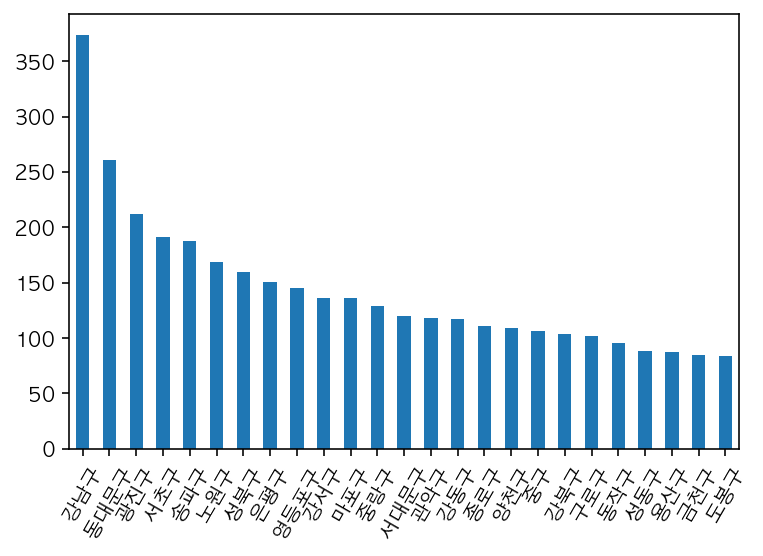

In [59]:
c.plot.bar(rot = 60)

In [60]:
df_seoul_hospital = df[(df['상권업종소분류명'] == '종합병원') 
   & (df['시도명'] == '서울특별시')].copy()

In [61]:
df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
강동구      5
송파구      5
중구       5
양천구      4
도봉구      4
서대문구     4
강북구      4
성북구      3
동대문구     2
성동구      2
중랑구      2
강서구      2
구로구      2
노원구      2
관악구      2
종로구      2
금천구      2
은평구      1
동작구      1
용산구      1
마포구      1
Name: 시군구명, dtype: int64

In [62]:
# 텍스트 데이터 색인
# ~ == not

df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원')
                     , '상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [63]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [64]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('의료기')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296


In [65]:
# 꽃배달|의료기|장례식장|상담소|어린이집 -> 종합병원으로 보기 어려움

drop_row = df_seoul_hospital[
    df_seoul_hospital['상호명'].str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [66]:
# 의원도 종합병원으로 보기에는 무리

drop_row2 = df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith('의원')].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [67]:
drop_row = drop_row + drop_row2
len(drop_row)

33

In [68]:
# axis == 0 -> 행 / 1 -> 열

print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis = 0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


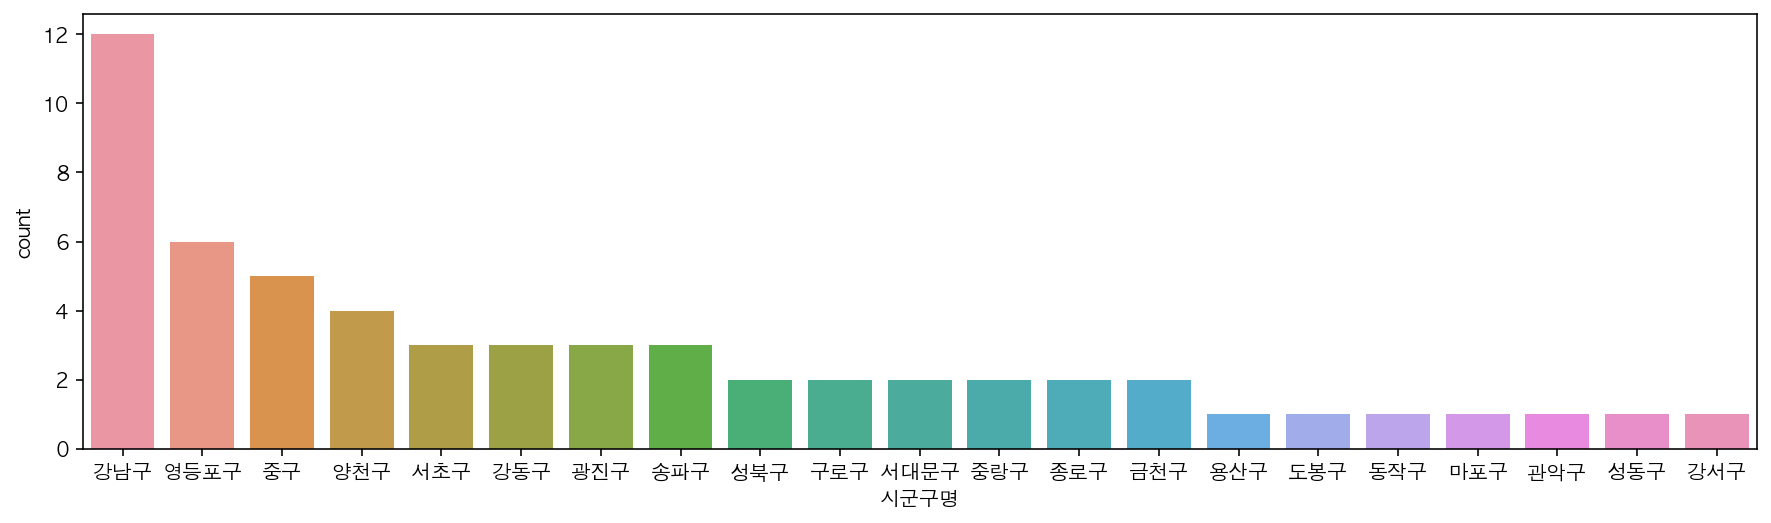

In [69]:

plt.figure(figsize = (15, 4))
sns.countplot(data = df_seoul_hospital, x = '시군구명', 
              order = df_seoul_hospital['시군구명'].value_counts().index)

In [70]:
df_seoul_hospital['상호명'].unique()

# 여전히 우울증센터, 재단등 종합병원으로 보기 힘든곳이 많음. -> 데이터 전처리가 어려움

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

## 3-9

In [71]:
# 특정 지역만 보기

df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(18943, 29)

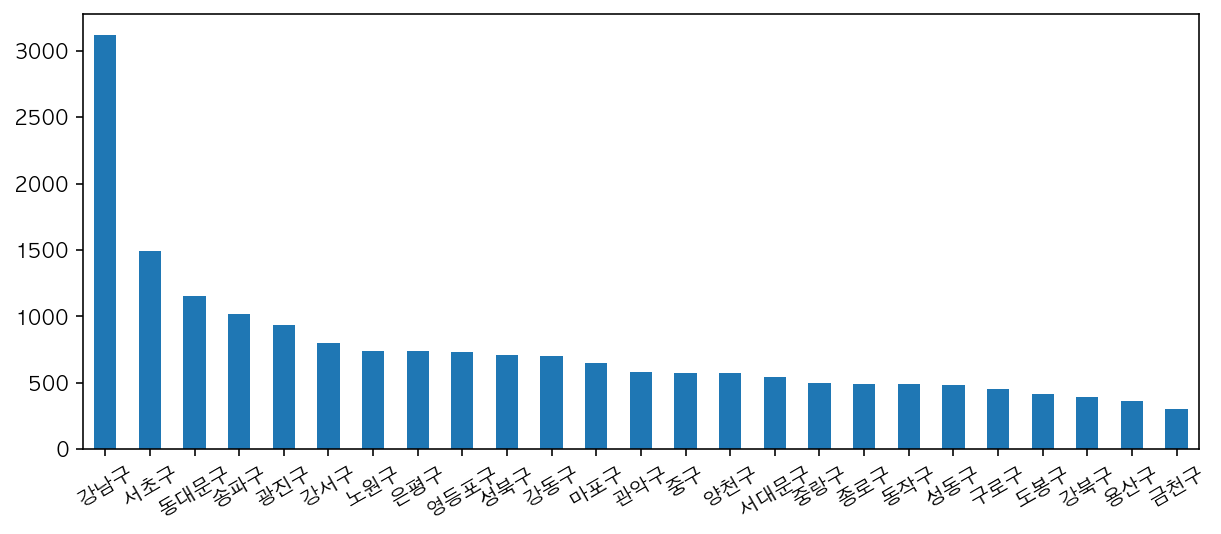

In [72]:
df_seoul['시군구명'].value_counts().plot.bar(figsize = (10, 4), rot = 30)

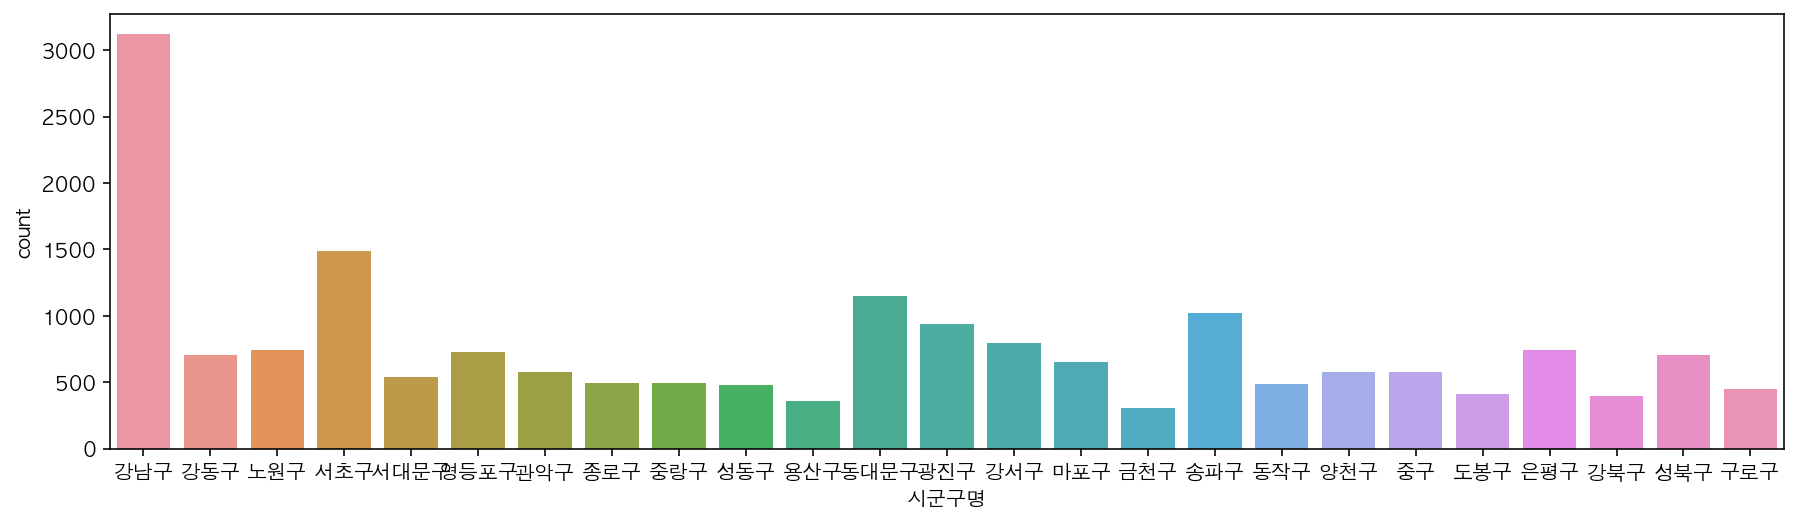

In [73]:
plt.figure(figsize = (15, 4))
sns.countplot(data = df_seoul, x = '시군구명')

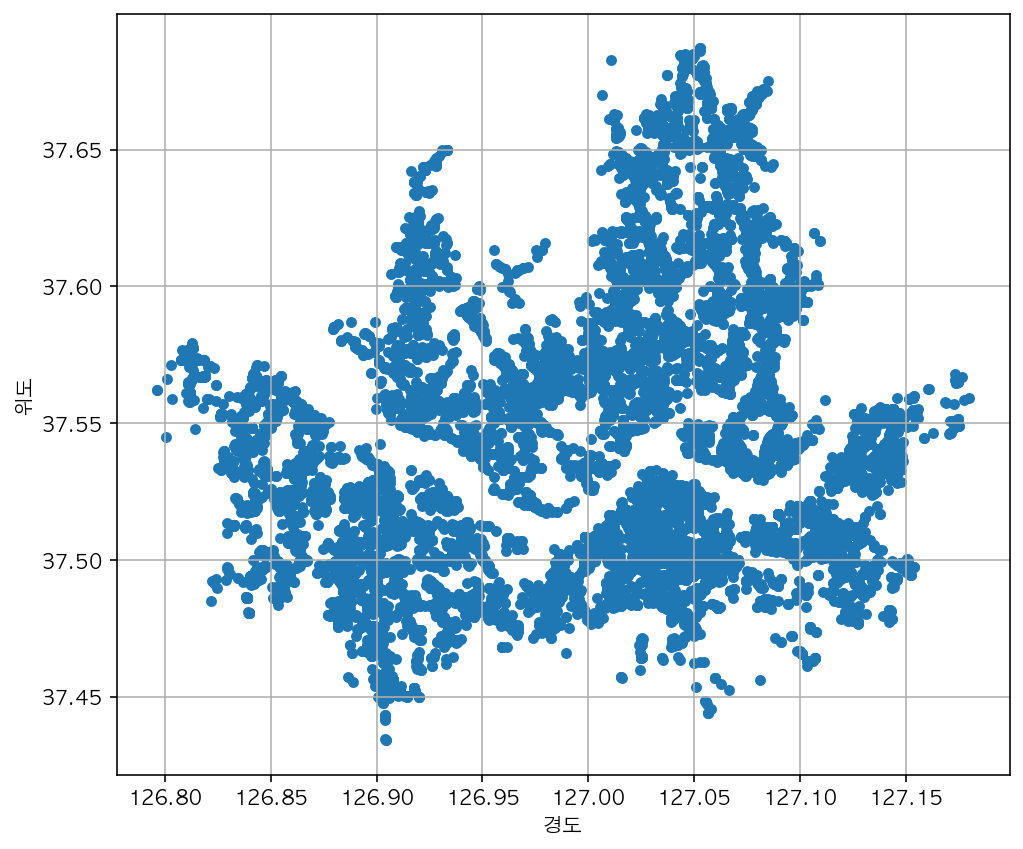

In [74]:
# scatter plot

df_seoul[['경도', '위도', '시군구명']].plot.scatter(x = '경도', y = '위도'
                                           , figsize = (8, 7), grid = True)

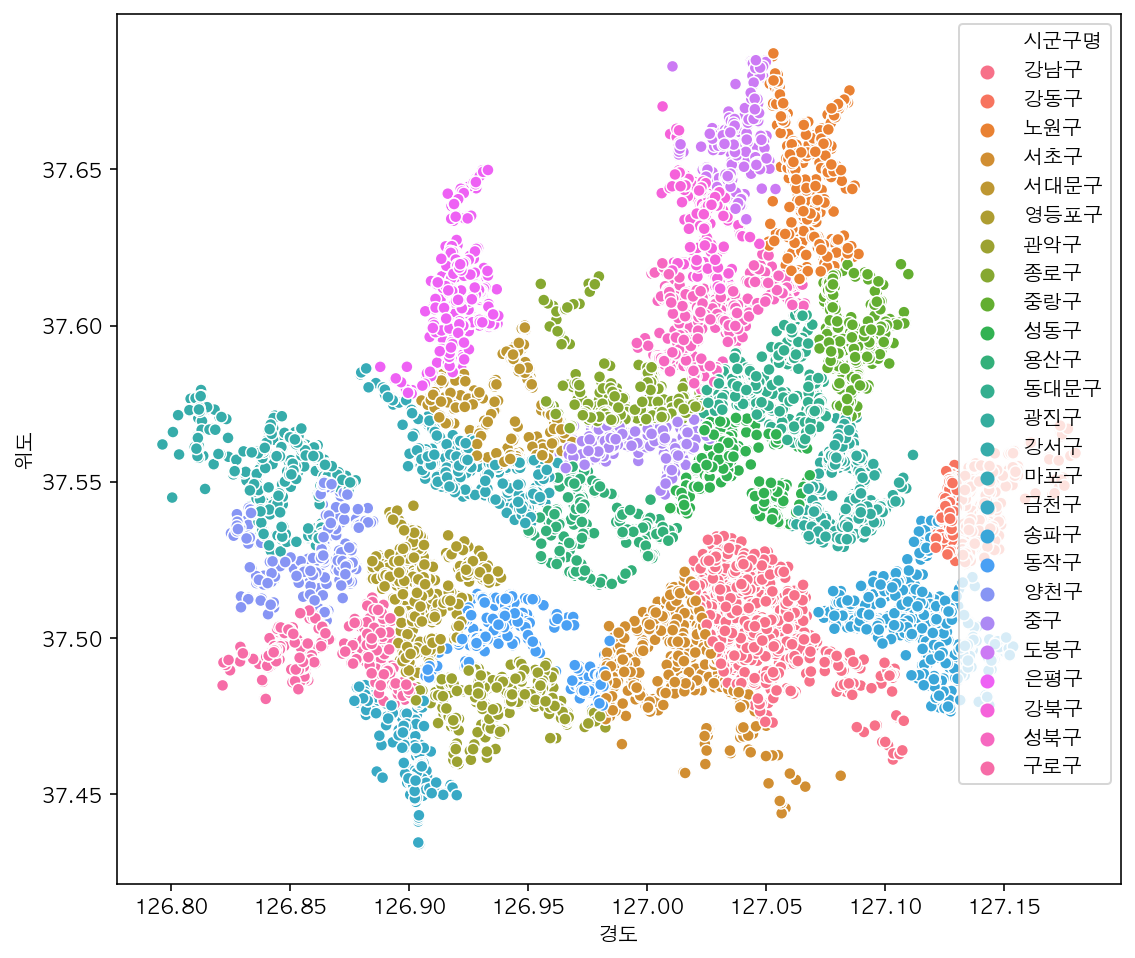

In [75]:

plt.figure(figsize = (9, 8))
sns.scatterplot(data = df_seoul, x = '경도', y = '위도', hue = '시군구명')

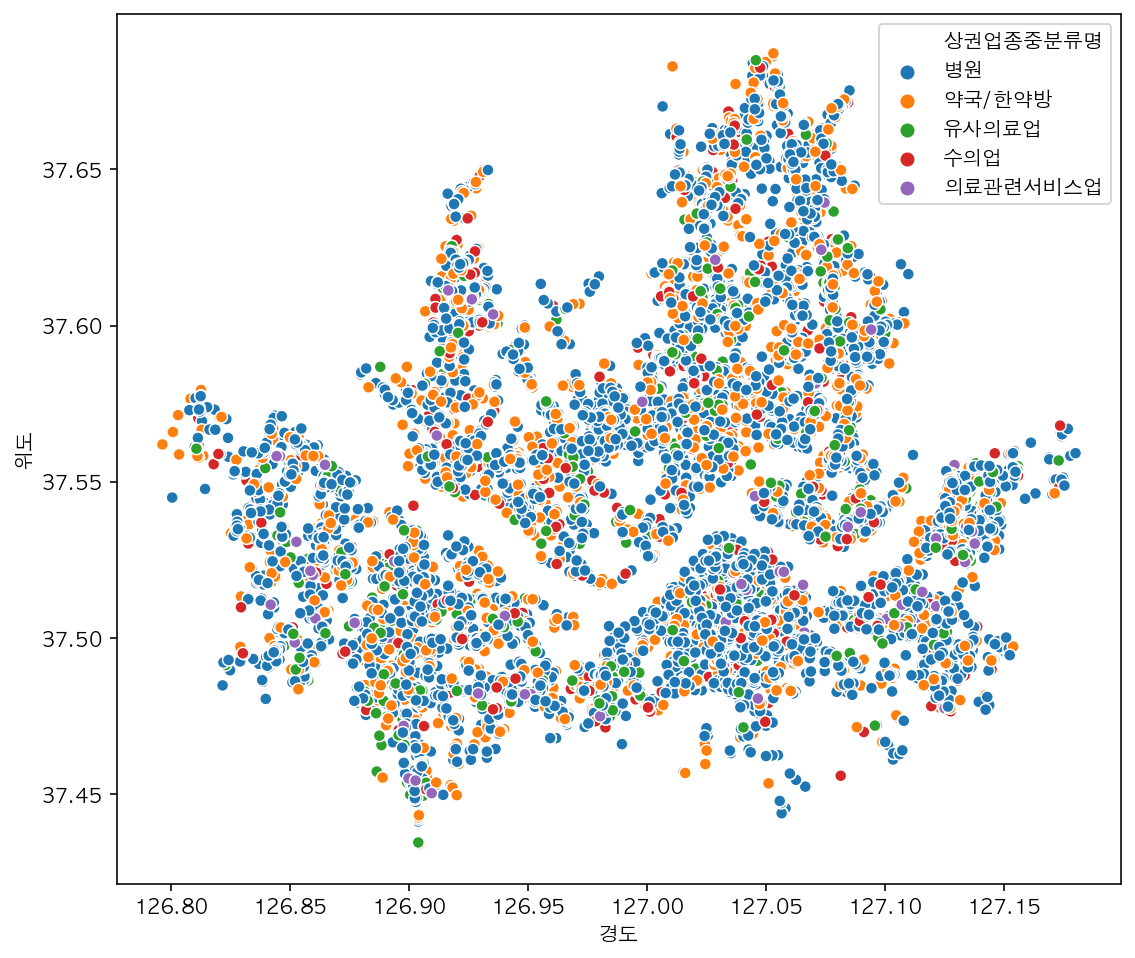

In [76]:
plt.figure(figsize = (9, 8))
sns.scatterplot(data = df_seoul, x = '경도', y = '위도'
                , hue = '상권업종중분류명')

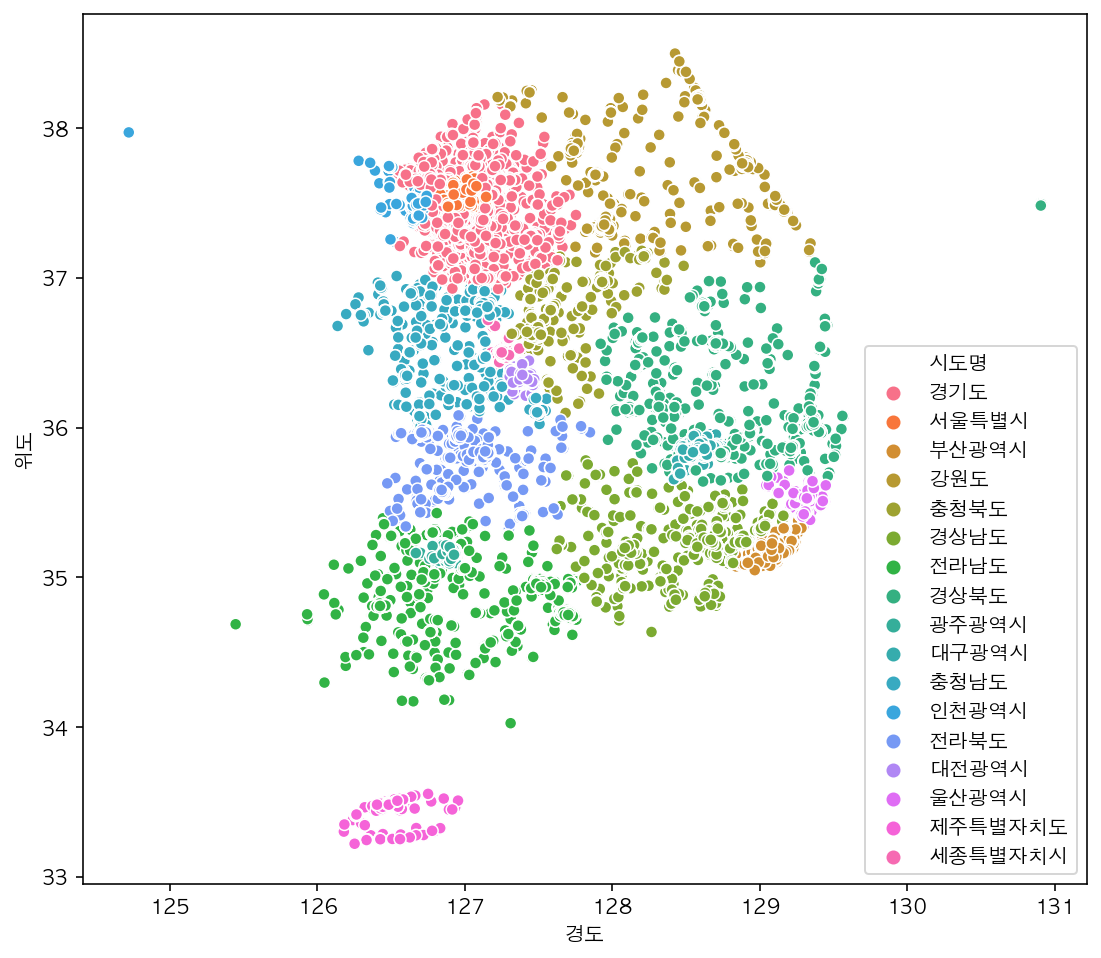

In [77]:
# 전체데이터에 대한 시도명 기준 경도/위도

plt.figure(figsize = (9, 8))
sns.scatterplot(data = df, x = '경도', y = '위도'
                , hue = '시도명')

## 3-10

In [78]:
# Folium으로 지도 활용
# conda install -c conda-forge folium 터미널에 입력

import folium


In [79]:
# 지도 중심을 잡기위해 Data의 위도/경도 평균구함

df_seoul_hospital['위도'].mean()
df_seoul_hospital['경도'].mean()

126.9963589356625

In [80]:
# control+/ => 주석처리
# marker추가 / location = marker위치, popup = marker클릭시 뜨는 문구

map = folium.Map(location = [df_seoul_hospital['위도'].mean()
                         ,df_seoul_hospital['경도'].mean()], zoom_start = 12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, '상호명']
    address = df_seoul_hospital.loc[n, '도로명주소']
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, '위도'], df_seoul_hospital.loc[n, '경도']]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map
